# Introduction à BioPython - Corrigé

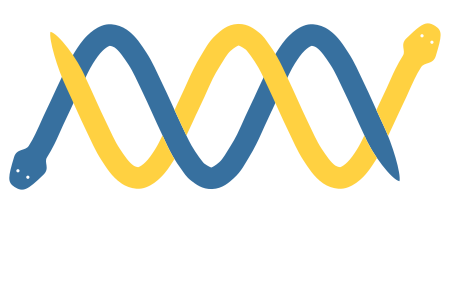

Corrigé de l'exercice.

### Partie 1 : Lecture et inspection du fichier FASTA

Commençons par importer les modules nécessaires.

In [1]:
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.SeqUtils import gc_fraction
import pandas as pd

# Cacher les avertissements
import warnings
warnings.filterwarnings('ignore')

# Charger le fichier FASTA
fichier_fasta = 'Anolis.fas'
séquences = list(SeqIO.parse(fichier_fasta, 'fasta'))

# Aperçu de la première entrée
print(séquences[0])

<ipython-input-1-e0e0ed05486e>:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ID: SQUAP510-16|Anolis
Name: SQUAP510-16|Anolis
Description: SQUAP510-16|Anolis humilis|COI-5P|MH139994
Number of features: 0
Seq('CTTTACTTAATCTTTGGGGCCTGGGCTGGGATAGTTGGTACAGCCTTAAGCCTG...TTC')


#### A) Afficher le nombre de séquences

In [2]:
print(f'Nombre de séquences dans le fichier : {len(séquences)}')

Nombre de séquences dans le fichier : 58


### Partie 2 : Extraction de données

#### B) Extraire les noms d'espèces et biomarqueurs

Il pourrait être utile de voir à quoi ressemble les descriptions de chaque entrée du fichier FASTA en imprimant la description de la première entrée (`print(séquences[0].description)`) afin d'extraire le nom de l'espèce et du biomarqueur (le gène auquel correspond chaque séquence).

In [3]:
# Aperçu de la description de la première séquence du fichier
print(séquences[0].description)

SQUAP510-16|Anolis humilis|COI-5P|MH139994


Ne pas oublier qu'avec Python, l'indexation commence à 0.

`SQUAP510-16|Anolis humilis|COI-5P|MH139994`

Ici, l'identifiant unique de la séquence "SQUAP510-16" pourra être extrait avec `seq.description.split('|')[0]`

In [4]:
# Extraire les noms d'espèces
espèces = [seq.description.split('|')[1] for seq in séquences]

# Extraire les biomarqueurs
biomarq = [seq.description.split('|')[2] for seq in séquences]

#### C) Extraire le reste des informations

In [5]:
# Extraire les indentifiants uniques
ids = [seq.id.split('|')[0] for seq in séquences]

# Extraire les séquences
seqs = [str(seq.seq) for seq in séquences] # obligation de convertir la séquence en texte ou "string"
                                           # pour l'intégrer dans le DataFrame (le tableau)

# Extraire la longueur de chaque séquence
lens = [len(seq.seq) for seq in séquences]

#### D) Convertir en DataFrame (tableau)

La fonction Python `apply()`permet d'appliquer une fonction à chaque élément d'un DataFrame. Pour ajouter une colonne correspondant au taux de guanine/cytosine (ratio GC), il faudra employer une fonction vue dans le cours.

In [6]:
# Convertir les informations prélevées en DataFrame
séquences_df = pd.DataFrame({'id':ids, 'espèce':espèces, 'seq':seqs,
                             'biomarqueur':biomarq, 'len':lens}).set_index('id')

# Ajouter une colonne calculant le taux de GC dans chaque séquence
séquences_df['ratio_gc'] = séquences_df['seq'].apply(gc_fraction)

# Remplacer tous les "-" par "N" dans la colonne "seq"
séquences_df['seq'] = séquences_df['seq'].str.replace('-', 'N')

#### E) Aperçu du DataFrame

In [7]:
print(séquences_df.head())

                            espèce  \
id                                   
SQUAP510-16         Anolis humilis   
UTCHB010-24   Anolis maculiventris   
GBGC17389-19      Anolis mccraniei   
GBGC17466-19      Anolis lemurinus   
GBGC17469-19   Anolis laeviventris   

                                                            seq biomarqueur  \
id                                                                            
SQUAP510-16   CTTTACTTAATCTTTGGGGCCTGGGCTGGGATAGTTGGTACAGCCT...      COI-5P   
UTCHB010-24   CACCCTTTACCTTATTTTTGGTGCTTGAGCTGGTATAGTTGGAACA...      COI-5P   
GBGC17389-19  CTGTACCTAATCTTTGGGGCCTGAGCCGGGATAGTTGGTACAGCAT...      COI-5P   
GBGC17466-19  CTATACTTAATCTTTGGGGCCTGAGCCGGAATAGTCGGCACAGCTC...      COI-5P   
GBGC17469-19  TTATATTTAATCTTTGGGGCCTGGGCCGGAATAGTAGGAACAGCCC...      COI-5P   

              len  ratio_gc  
id                           
SQUAP510-16   654  0.434251  
UTCHB010-24   658  0.408815  
GBGC17389-19  623  0.433387  
GBGC17466-19  654  0.408257  

### Partie 3 : Analyse des séquences

#### F) Calculer la longueur moyenne des séquences

In [8]:
print(séquences_df['len'].mean())

630.8103448275862


#### G) Identifier la séquence la plus longue
L'attribut Python `.loc` permet de sélectionner la ligne entière correspondant à une valeur de l'index d'un DataFrame. Ici les valeurs dans l'index correspondent à l'identifiant unique d'une séquence. Pour extraire chaque information correspondant à un identifiant unique, on peut donc utiliser `print(séquences_df.loc[id])` si `id` correspondant à l'identifiant unique.

In [9]:
# Identifier la valeur maximale dans la colonne "len"
print(séquences_df['len'].max())

# Identifier l'identifiant unique correspondant à la séquence ayant la plus grande valeur "len"
id_max = séquences_df['len'].idxmax()

# Imprimer toutes les informations correspondant à cette même séquence
print(séquences_df.loc[id_max])

706
espèce                                            Anolis auratus
seq            AACAAAATCATAAAGACATCGGCACCCTGTACCTAATCTTCGGGGC...
biomarqueur                                               COI-5P
len                                                          706
ratio_gc                                                0.487252
Name: MJNV039-24, dtype: object


#### H) Identifier la séquence la plus courte

On pourra utiliser `min()` et `idxmin()` pour identifier la valeur minimale d'une colonne.

In [10]:
# Identifier la valeur minimale dans la colonne "len"
print(séquences_df['len'].min())

# Identifier l'identifiant unique correspondant à la séquence ayant la plus petite valeur "len"
id_min = séquences_df['len'].idxmin()

# Imprimer toutes les informations correspondant à cette même séquence
print(séquences_df.loc[id_min])

467
                   espèce                                                seq  \
id                                                                             
ABR834-13  Anolis ibanezi  AGGTAGCGTAATCACTTGTCTTCTAAATAAAGACCAGTATGAACGG...   
ABR834-13  Anolis ibanezi  NNNNNNTTTTTGGTGCTTGAGCTGGAATAGTAGGAACAGGCTTAAG...   

          biomarqueur  len  ratio_gc  
id                                    
ABR834-13         16S  467  0.377483  
ABR834-13      COI-5P  672  0.411200  


#### I) Déterminer la composition en nucléotides (A, C, G et T) d'une séquence

In [11]:
# Composition en nucléotides pour la première séquence de "séquences_df"
entrée1 = séquences_df.iloc[0]

print('Composition en nucléotides pour la séquence', entrée1.name, ':')
for char in ['A','C','T','G']:
    print(char, ':', entrée1['seq'].count(char))

Composition en nucléotides pour la séquence SQUAP510-16 :
A : 158
C : 161
T : 212
G : 123


### Partie 4 : Filter les séquences

1) Garder uniquement les séquences correspondant au biomarqueur "COI-5P" (colonne "biomarqueur")
2) Retirer les séquences correspondant à une espèce indéfinie (indiquée par la présence du suffixe "sp." dans le nom de l'espèce)
3) Garder uniquement les séquences faisant plus de 600 caractères
4) Garder uniquement les séquences avec un taux de GC supérieur à 38%
5) Garder une seule séquence par espèce (la plus longue)

Combien d'entrées reste-t-il dans le DataFrame ?

In [12]:
# Étape 1 : Filtrer les séquences pour le biomarqueur "COI-5P"
séquences_df = séquences_df.query('biomarqueur == "COI-5P"')

# Étape 2 : Retirer les séquences pour lesquelles le nom d'espèce contient "sp."
séquences_df = séquences_df[~séquences_df['espèce'].str.contains(" sp.")]

# Étape 3 : Garder uniquement les séquences de plus de 600 caractères
séquences_df = séquences_df.query('len > 600')

# Étape 4 : Garder uniquement les séquences avec un taux de GC supérieur à 38%
séquences_df = séquences_df.query('ratio_gc > 0.38')

# Étape 5 : Garder une seule séquence par espèce (la plus longue)
séquences_df = séquences_df.loc[séquences_df.groupby('espèce')['len'].idxmax()]

# Nombre d'entrées restantes dans le DataFrame
print("Nombre d'entrées restantes", len(séquences_df))

Nombre d'entrées restantes 33


### Partie 5 : Traduction en protéines

In [13]:
# Traduire les séquences en protéines
séquences_df['seq_protéine'] = [str(Seq(seq).translate()) for seq in séquences_df.seq]

# Afficher les séquences d'acides aminés après traduction
print(séquences_df.head(10)['seq_protéine'])

id
GBGCR848-15     TLYLIFGA*AGIIGTGLSLLIRAELSQPGALLGDDQIYNVIVTAHA...
NMNHR1236-17    PIPNFWCLSRHSWHCP*PSYPSRTEPTWGPTGRRSDLQRHRYSPRF...
NMNHR621-17     PLLNFWCLGRNSGHSPELANSSRAKPARGPIRGRPDL*CGCYSPCL...
NMNHR553-17     PVLNFWCLSGHGWHSPEPVNPSGAKPTRGPTRGRPNL*CYRNSPCL...
MJNV039-24      NKIIKTSAPCT*SSGPGLE*LAQPLAF*SELS*ASRGPC*GMTKST...
NMNHR905-17     PLFNFWCLSRHSRHSFKPPHSSRTKPTRGPLGRRPNL*CCCYSPCL...
GBGCR886-15     HPILNLWRLGRNSRNGPKPSYSSRTKPTRGLIR**PNLQRYCYRPC...
NMNHR1418-17    PLFNLWCLGRNSWNSLKLINSSRAKPTWGTTRRRSNL*CDRDSPCF...
SQUAP427-16     LYLIFGA*AGMVGTGLSLLIRAELSQPGALLGDDQIYNVVVTAHAF...
NMNHR317-17     PLPDFWCLGRHSRHRP*PPYSSGTKPAGGLTWR*PNL*RHCHSPRF...
Name: seq_protéine, dtype: object


### Partie 6 : Alignement
On peut ici remplacer les identifiants uniques par les noms d'espèce car on a conservé uniquement une séquence par espèce.

In [ ]:
from Bio import AlignIO
from Bio.SeqRecord import SeqRecord

# Créer un object SeqRecord avec chaque entrée unique
entrées_uniques = [SeqRecord(seq = Seq(séquences_df['seq'].iloc[i]), id = séquences_df['espèce'][i].replace(' ','_'))
                   for i in range(len(séquences_df))]

SeqIO.write(entrées_uniques, 'entrées_uniques.fasta', 'fasta')

33

* Téléchargez le fichier *entrées_uniques.fasta* sur votre ordinateur (clique-droit sur le nom du fichier, puis "Download").
* Rendez-vous sur le site **[Muscle](https://www.ebi.ac.uk/jdispatcher/msa/muscle?stype=protein)** pour réaliser l'alignement de cet ensemble de séquences.
* Appuyer sur le bouton *Choose file* et sélectionner le fichier *entrées_uniques.fasta*.

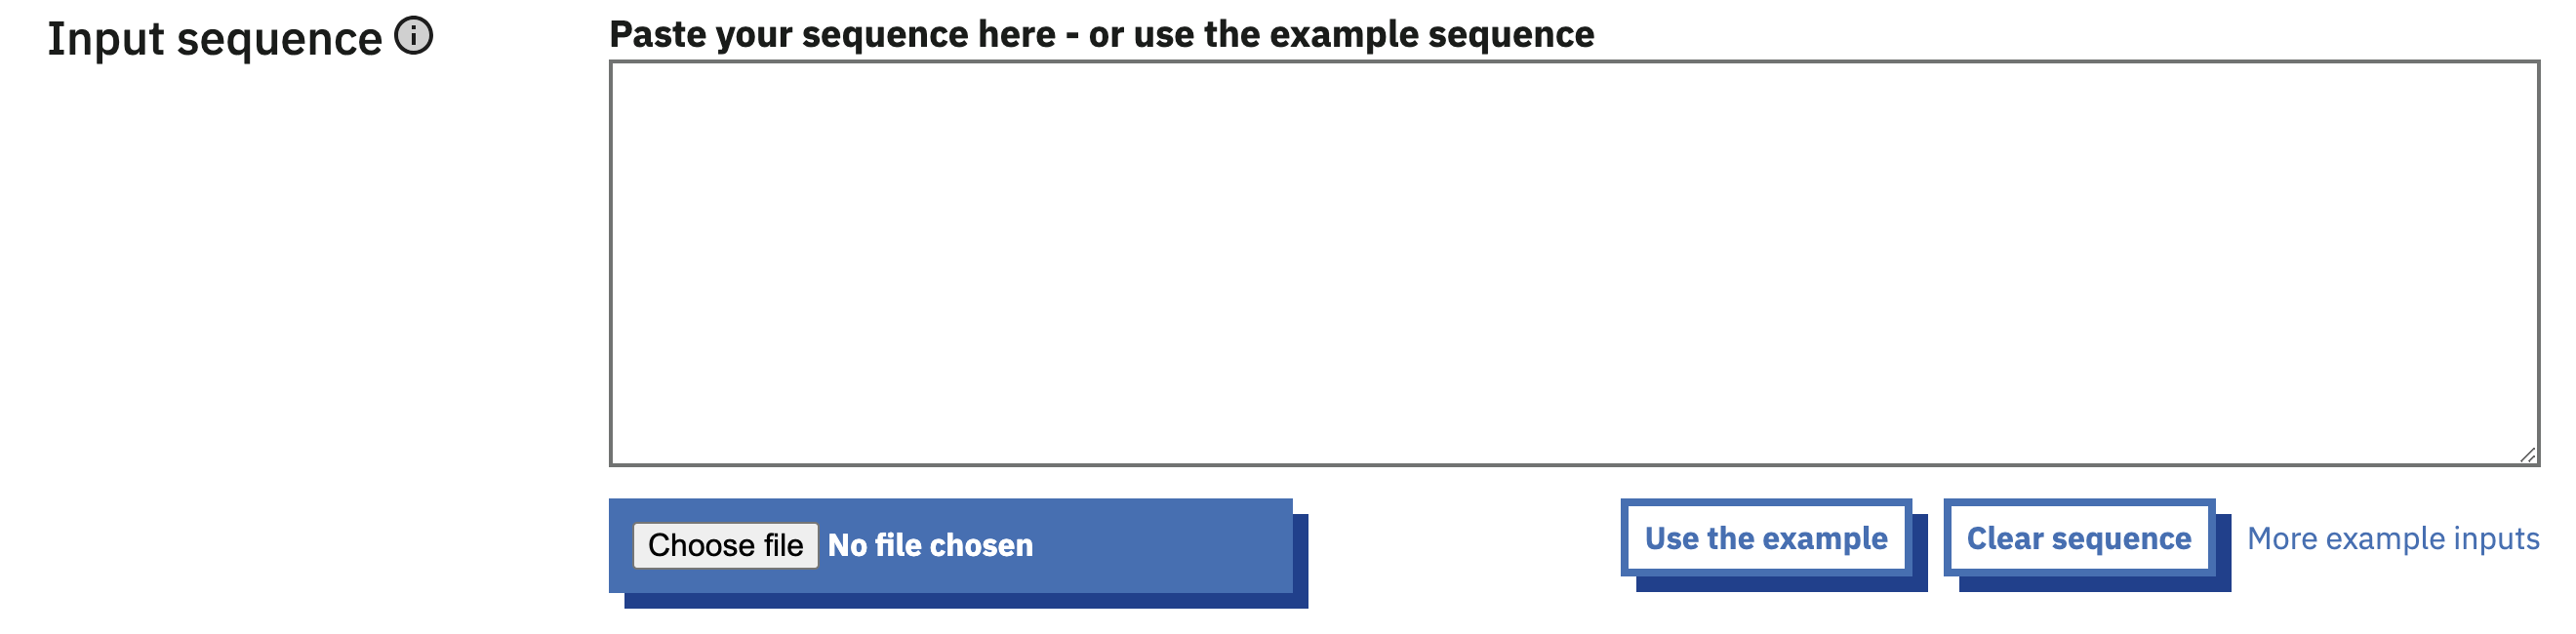

* Patientez quelques secondes.
* Appuyez sur le bouton *View Results*.
* Prenez le temps d'explorer la page des résultats.
* Dans la section "Alignement", choisissez la palette "nucleotide".

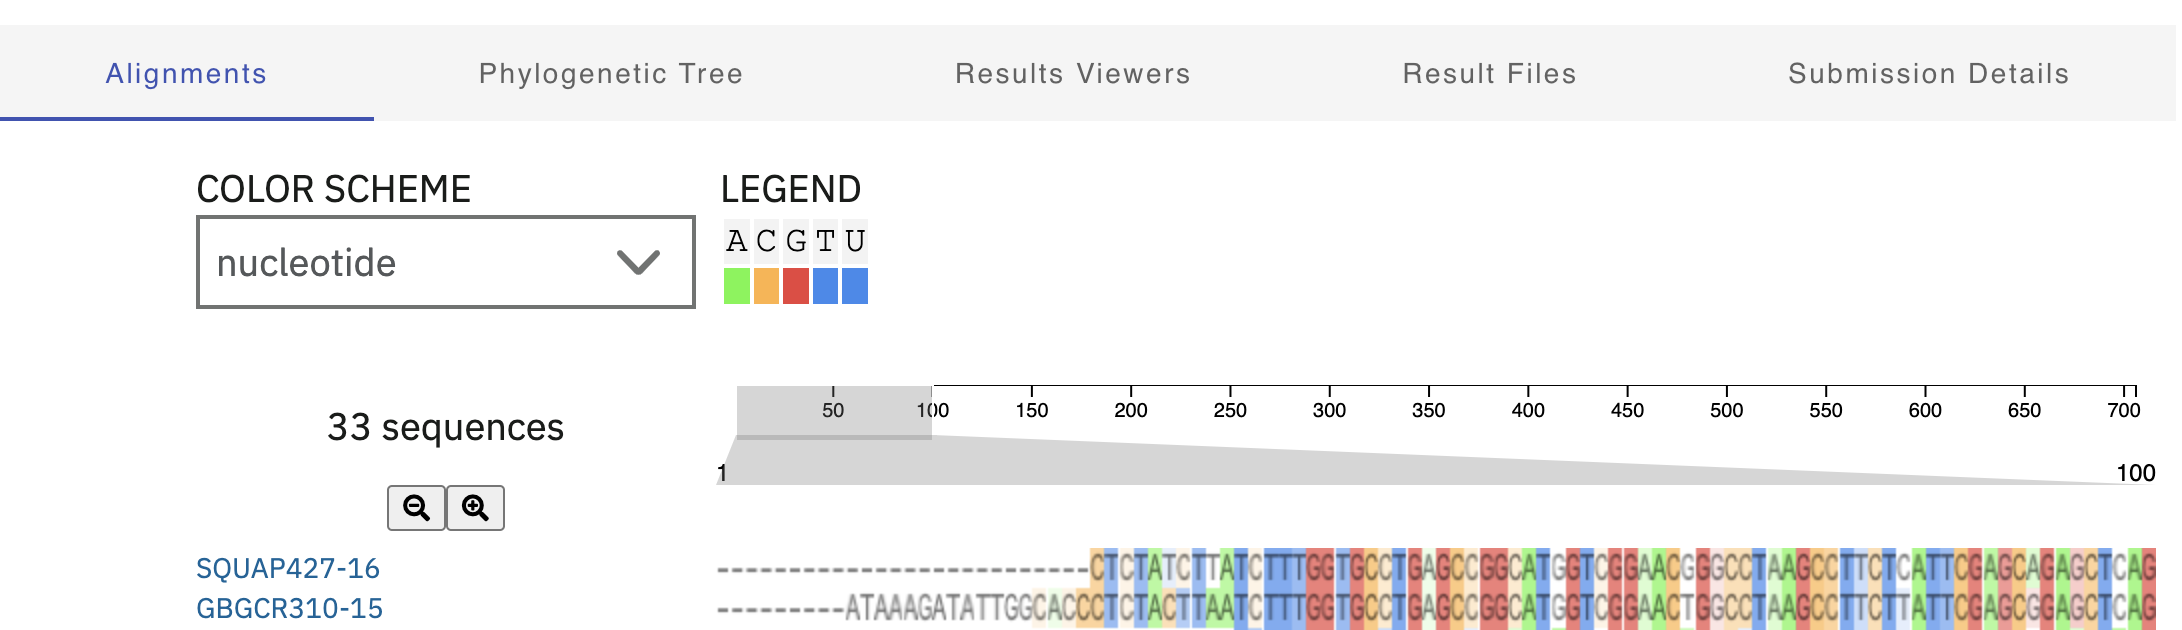

* Rendez-vous dans la section "Phylogenetic Tree". Descendez en bas de la page pour voir une représentation de l'arbre phylogénétique des espèces d'*Anolis*. Les espèces les plus proches sont celles dont la séquence était la plus similaire. Le gène *COI-5P* sur lequel est basé cet arbre est un biomarqueur fréquemment utilisé pour établir ce genre de relations entre espèces.

## Conclusion

Dans cet exercice, vous avez :
- Manipulé des fichiers FASTA avec **BioPython**.
- Effectué des analyses biologiques sur des séquences.
- Traduit des séquences nucléotidiques en protéines.
- Aligné des séquences traduites.
- Visualisé les résultats sous forme de graphiques et d'arbres phylogénétiques.

N'hésitez pas à explorer davantage et à poser des questions si besoin !